# MOVIE PROFITABILITY PROJECT
by Marion Mengich

*A data analysis project to identify high-performing movie types using budget, gross, and ROI.*

## 1. BUSINESS UNDERSTANDING
Success in the multibillion-dollar worldwide film industry is frequently determined by box office results.  But not every film with a large box office receipt is a financial success.  Studios spend a lot of money on production, marketing, and distribution, so it's critical to know what kinds of movies make the most money and provide the best return on investment (ROI).

In order to provide insights that help direct future film production and investment decisions, this project focuses on evaluating financial data related to motion pictures, such as production budgets, local and foreign gross sales, and profits.  Studios and investors can make data-driven decisions about resource allocation by having a thorough understanding of historical performance trends.

### 1.1 Objectives
**Main objective**

* Analyze movie financial performance data and advise film industry stakeholders on what kinds of movies should be prioritized.

**Specific objectives**

* Identify the most profitable movies.

* Determine whether increased spending is associated with higher returns ,

* Identify top-performing studios.

* Evaluate changes in movie profitability over time.

## 2. Data understanding
- The data used for analysis are from:
    
    **Box Office Mojo**: It is used to track box office revenue and performance of movie.
    
    **The Numbers**: It offers data and analysis on movie box office earnings, production budgets, and related financial aspects.

### 2.1 Data description
This is a summary of all the datasets give

In [1]:
#import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
import scipy.stats as stats
%matplotlib inline

In [2]:
#load the dataset(box office mojo)
bom_movie = pd.read_csv("C:/Users/Administrator/Downloads/p2files/bom.movie_gross.csv")
bom_movie

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [3]:
bom_movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [4]:
bom_movie.describe()

,domestic_gross,year
count,3.359000e+03,3387.000000
mean,2.874585e+07,2013.958075
std,6.698250e+07,2.478141
min,1.000000e+02,2010.000000
25%,1.200000e+05,2012.000000
50%,1.400000e+06,2014.000000
75%,2.790000e+07,2016.000000
max,9.367000e+08,2018.000000


In [5]:
budget= pd.read_csv("C:/Users/Administrator/Downloads/p2files/tn.movie_budgets.csv")
budget

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [6]:
budget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [7]:
# checking statistical summary for categorical columns
budget.describe(include = 'O').T

,count,unique,top,freq
release_date,5782,2418,"Dec 31, 2014",24
movie,5782,5698,Halloween,3
production_budget,5782,509,"$20,000,000",231
domestic_gross,5782,5164,$0,548
worldwide_gross,5782,5356,$0,367


In [8]:
#load rotten tomatoes(movie info) dataset
rt_info= pd.read_csv("C:/Users/Administrator/Downloads/p2files/rt.movie_info.tsv", sep ="\t")
rt_info

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1555,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",$,"33,886,034",106 minutes,New Line Cinema
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",NaN,NaN,88 minutes,Paramount Vantage
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,"Jan 1, 1962","May 11, 2004",NaN,NaN,111 minutes,NaN
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",NaN,NaN,101 minutes,NaN


In [9]:
rt_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


In [10]:
#statistical summary of categorical columns
rt_info.describe(include='O').T

,count,unique,top,freq
synopsis,1498,1497,A group of air crash survivors are stranded in...,2
rating,1557,6,R,521
genre,1552,299,Drama,151
director,1361,1125,Steven Spielberg,10
writer,1111,1069,Woody Allen,4
theater_date,1201,1025,"Jan 1, 1987",8
dvd_date,1201,717,"Jun 1, 2004",11
currency,340,1,$,340
box_office,340,336,"600,000",2
runtime,1530,142,90 minutes,72


In [11]:
#load rotten tomato (reviews) dataset
rt_reviews=pd.read_csv("C:/Users/Administrator/Downloads/p2files/rt.reviews.tsv",sep="\t",encoding='ISO-8859-1')
rt_reviews

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"
...,...,...,...,...,...,...,...,...
54427,2000,The real charm of this trifle is the deadpan c...,NaN,fresh,Laura Sinagra,1,Village Voice,"September 24, 2002"
54428,2000,NaN,1/5,rotten,Michael Szymanski,0,Zap2it.com,"September 21, 2005"
54429,2000,NaN,2/5,rotten,Emanuel Levy,0,EmanuelLevy.Com,"July 17, 2005"
54430,2000,NaN,2.5/5,rotten,Christopher Null,0,Filmcritic.com,"September 7, 2003"


In [12]:
rt_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      48869 non-null  object
 2   rating      40915 non-null  object
 3   fresh       54432 non-null  object
 4   critic      51710 non-null  object
 5   top_critic  54432 non-null  int64 
 6   publisher   54123 non-null  object
 7   date        54432 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB


In [13]:
rt_reviews.describe(include='O')

,review,rating,fresh,critic,publisher,date
count,48869,40915,54432,51710,54123,54432
unique,48682,186,2,3496,1281,5963
top,Parental Content Review,3/5,fresh,Emanuel Levy,eFilmCritic.com,"January 1, 2000"
freq,24,4327,33035,595,673,4303


In [14]:
rt_reviews.describe()

,id,top_critic
count,54432.000000,54432.000000
mean,1045.706882,0.240594
std,586.657046,0.427448
min,3.000000,0.000000
25%,542.000000,0.000000
50%,1083.000000,0.000000
75%,1541.000000,0.000000
max,2000.000000,1.000000


In [15]:
# check the content for the imdb database
# connect to database
conn= sqlite3.connect("C:/Users/Administrator/Downloads/p2files/im.db")

pd.read_sql("""SELECT * 
               FROM sqlite_master
                   """, conn)

,type,name,tbl_name,rootpage,sql
0,table,movie_basics,movie_basics,2,"CREATE TABLE ""movie_basics"" (\n""movie_id"" TEXT..."
1,table,directors,directors,3,"CREATE TABLE ""directors"" (\n""movie_id"" TEXT,\n..."
2,table,known_for,known_for,4,"CREATE TABLE ""known_for"" (\n""person_id"" TEXT,\..."
3,table,movie_akas,movie_akas,5,"CREATE TABLE ""movie_akas"" (\n""movie_id"" TEXT,\..."
4,table,movie_ratings,movie_ratings,6,"CREATE TABLE ""movie_ratings"" (\n""movie_id"" TEX..."
5,table,persons,persons,7,"CREATE TABLE ""persons"" (\n""person_id"" TEXT,\n ..."
6,table,principals,principals,8,"CREATE TABLE ""principals"" (\n""movie_id"" TEXT,\..."
7,table,writers,writers,9,"CREATE TABLE ""writers"" (\n""movie_id"" TEXT,\n ..."


# DATA CLEANING AND PREPARATION
In this section I conducted the following activities:

* Drop unnecessary columns.

* Handle missing values.

* Check for duplicates.

* Merging of dataframes.

In [16]:
#Cleaning Box office mojo dataset
#checking for missing values
bom_movie.isnull().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [17]:
#checking data type for each column
bom_movie.dtypes

title              object
studio             object
domestic_gross    float64
foreign_gross      object
year                int64
dtype: object

In [18]:
#drop rows
bom_movie=bom_movie.dropna(subset = ["domestic_gross","studio"])
bom_movie

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [19]:
#remove commas from values in the column
bom_movie.loc[:, 'foreign_gross'] = bom_movie['foreign_gross'].str.replace(',', '')
bom_movie.loc[:, 'foreign_gross'] = pd.to_numeric(bom_movie['foreign_gross'])

In [20]:
#fill foreign_gross column missing values with median
bom_movie.loc[:,'foreign_gross'] = bom_movie['foreign_gross'].fillna(bom_movie['foreign_gross'].median())
bom_movie

C:\Users\Administrator\AppData\Local\Temp\ipykernel_10412\2027429767.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  bom_movie.loc[:,'foreign_gross'] = bom_movie['foreign_gross'].fillna(bom_movie['foreign_gross'].median())


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010
3,Inception,WB,292600000.0,535700000.0,2010
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,19400000.0,2018
3383,Edward II (2018 re-release),FM,4800.0,19400000.0,2018
3384,El Pacto,Sony,2500.0,19400000.0,2018
3385,The Swan,Synergetic,2400.0,19400000.0,2018


In [21]:
#checking for duplicates
bom_movie.duplicated().sum()

0

In [22]:
#checking for null and missing values
bom_movie.isnull().sum()

title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

In [23]:
#cleaning budgets dataset
budget.isnull().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [24]:
#checking for duplicates
budget.duplicated().sum()

0

### MERGING
I decided to use The box office mojo dataset and The Numbers dataset for my analysis because I can:

* See both costs and earnings of movies.

* Calculate profit and ROI.

* Understand which movies made the most money compared to their budgets.

This helps give a full picture of which types of movies perform best financially.

In [25]:
# rename movie column to title in the tn movie_dataset(budget)
budget.rename(columns={'movie' : 'title'},inplace = True)
budget

,id,release_date,title,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [26]:
#splitting the string 2 times, month and date and year
budget['release_date'].str.split(',',n=2,expand = True)

,0,1
0,Dec 18,2009
1,May 20,2011
2,Jun 7,2019
3,May 1,2015
4,Dec 15,2017
...,...,...
5777,Dec 31,2018
5778,Apr 2,1999
5779,Jul 13,2005
5780,Sep 29,2015


In [27]:
#creating new columns for the month and year
budget['release_date'].str.split(',',n=2,expand = True).rename(columns = {0:'month_date',1:'year'})

,month_date,year
0,Dec 18,2009
1,May 20,2011
2,Jun 7,2019
3,May 1,2015
4,Dec 15,2017
...,...,...
5777,Dec 31,2018
5778,Apr 2,1999
5779,Jul 13,2005
5780,Sep 29,2015


In [28]:
budget[['month_date','year']]=budget['release_date'].str.split(',',n=2,expand = True)
budget

,id,release_date,title,production_budget,domestic_gross,worldwide_gross,month_date,year
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",Dec 18,2009
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",May 20,2011
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",Jun 7,2019
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",May 1,2015
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",Dec 15,2017
...,...,...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0,Dec 31,2018
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495",Apr 2,1999
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338",Jul 13,2005
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0,Sep 29,2015


In [29]:
#dropping release and month date
budget= budget.drop(['release_date','month_date'],axis=1, errors='ignore')
budget

,id,title,production_budget,domestic_gross,worldwide_gross,year
0,1,Avatar,"$425,000,000","$760,507,625","$2,776,345,279",2009
1,2,Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",2011
2,3,Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",2019
3,4,Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",2015
4,5,Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",2017
...,...,...,...,...,...,...
5777,78,Red 11,"$7,000",$0,$0,2018
5778,79,Following,"$6,000","$48,482","$240,495",1999
5779,80,Return to the Land of Wonders,"$5,000","$1,338","$1,338",2005
5780,81,A Plague So Pleasant,"$1,400",$0,$0,2015


In [30]:
#merging the 2 datasets
df = pd.merge(budget,bom_movie, on='title', how='left')
df

,id,title,production_budget,domestic_gross_x,worldwide_gross,year_x,studio,domestic_gross_y,foreign_gross,year_y
0,1,Avatar,"$425,000,000","$760,507,625","$2,776,345,279",2009,NaN,NaN,NaN,NaN
1,2,Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",2011,BV,241100000.0,804600000.0,2011.0
2,3,Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",2019,NaN,NaN,NaN,NaN
3,4,Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",2015,BV,459000000.0,946400000.0,2015.0
4,5,Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",2017,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
5777,78,Red 11,"$7,000",$0,$0,2018,NaN,NaN,NaN,NaN
5778,79,Following,"$6,000","$48,482","$240,495",1999,NaN,NaN,NaN,NaN
5779,80,Return to the Land of Wonders,"$5,000","$1,338","$1,338",2005,NaN,NaN,NaN,NaN
5780,81,A Plague So Pleasant,"$1,400",$0,$0,2015,NaN,NaN,NaN,NaN


In [31]:
#dropping repeated columns
df = df.drop(['domestic_gross_y', 'year_y'], axis=1)
df

,id,title,production_budget,domestic_gross_x,worldwide_gross,year_x,studio,foreign_gross
0,1,Avatar,"$425,000,000","$760,507,625","$2,776,345,279",2009,NaN,NaN
1,2,Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",2011,BV,804600000.0
2,3,Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",2019,NaN,NaN
3,4,Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",2015,BV,946400000.0
4,5,Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",2017,NaN,NaN
...,...,...,...,...,...,...,...,...
5777,78,Red 11,"$7,000",$0,$0,2018,NaN,NaN
5778,79,Following,"$6,000","$48,482","$240,495",1999,NaN,NaN
5779,80,Return to the Land of Wonders,"$5,000","$1,338","$1,338",2005,NaN,NaN
5780,81,A Plague So Pleasant,"$1,400",$0,$0,2015,NaN,NaN


In [32]:
#renaming the columns
df.rename(columns={
    'domestic_gross_x': 'domestic_gross',
    'year_x': 'year'
}, inplace=True)

In [33]:
df['domestic_gross']=df['domestic_gross'].replace('[$,]', '', regex=True).astype(float)
df

,id,title,production_budget,domestic_gross,worldwide_gross,year,studio,foreign_gross
0,1,Avatar,"$425,000,000",760507625.0,"$2,776,345,279",2009,NaN,NaN
1,2,Pirates of the Caribbean: On Stranger Tides,"$410,600,000",241063875.0,"$1,045,663,875",2011,BV,804600000.0
2,3,Dark Phoenix,"$350,000,000",42762350.0,"$149,762,350",2019,NaN,NaN
3,4,Avengers: Age of Ultron,"$330,600,000",459005868.0,"$1,403,013,963",2015,BV,946400000.0
4,5,Star Wars Ep. VIII: The Last Jedi,"$317,000,000",620181382.0,"$1,316,721,747",2017,NaN,NaN
...,...,...,...,...,...,...,...,...
5777,78,Red 11,"$7,000",0.0,$0,2018,NaN,NaN
5778,79,Following,"$6,000",48482.0,"$240,495",1999,NaN,NaN
5779,80,Return to the Land of Wonders,"$5,000",1338.0,"$1,338",2005,NaN,NaN
5780,81,A Plague So Pleasant,"$1,400",0.0,$0,2015,NaN,NaN


In [34]:
df['foreign_gross']=df['foreign_gross'].replace('[$,]', '', regex=True).astype(float)
df['foreign_gross'] = pd.to_numeric(df['foreign_gross'], errors='coerce')
df

C:\Users\Administrator\AppData\Local\Temp\ipykernel_10412\744116873.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['foreign_gross']=df['foreign_gross'].replace('[$,]', '', regex=True).astype(float)


,id,title,production_budget,domestic_gross,worldwide_gross,year,studio,foreign_gross
0,1,Avatar,"$425,000,000",760507625.0,"$2,776,345,279",2009,NaN,NaN
1,2,Pirates of the Caribbean: On Stranger Tides,"$410,600,000",241063875.0,"$1,045,663,875",2011,BV,804600000.0
2,3,Dark Phoenix,"$350,000,000",42762350.0,"$149,762,350",2019,NaN,NaN
3,4,Avengers: Age of Ultron,"$330,600,000",459005868.0,"$1,403,013,963",2015,BV,946400000.0
4,5,Star Wars Ep. VIII: The Last Jedi,"$317,000,000",620181382.0,"$1,316,721,747",2017,NaN,NaN
...,...,...,...,...,...,...,...,...
5777,78,Red 11,"$7,000",0.0,$0,2018,NaN,NaN
5778,79,Following,"$6,000",48482.0,"$240,495",1999,NaN,NaN
5779,80,Return to the Land of Wonders,"$5,000",1338.0,"$1,338",2005,NaN,NaN
5780,81,A Plague So Pleasant,"$1,400",0.0,$0,2015,NaN,NaN


In [35]:
df['worldwide_gross']=df['worldwide_gross'].replace('[$,]', '', regex=True).astype(float)
df

,id,title,production_budget,domestic_gross,worldwide_gross,year,studio,foreign_gross
0,1,Avatar,"$425,000,000",760507625.0,2.776345e+09,2009,NaN,NaN
1,2,Pirates of the Caribbean: On Stranger Tides,"$410,600,000",241063875.0,1.045664e+09,2011,BV,804600000.0
2,3,Dark Phoenix,"$350,000,000",42762350.0,1.497624e+08,2019,NaN,NaN
3,4,Avengers: Age of Ultron,"$330,600,000",459005868.0,1.403014e+09,2015,BV,946400000.0
4,5,Star Wars Ep. VIII: The Last Jedi,"$317,000,000",620181382.0,1.316722e+09,2017,NaN,NaN
...,...,...,...,...,...,...,...,...
5777,78,Red 11,"$7,000",0.0,0.000000e+00,2018,NaN,NaN
5778,79,Following,"$6,000",48482.0,2.404950e+05,1999,NaN,NaN
5779,80,Return to the Land of Wonders,"$5,000",1338.0,1.338000e+03,2005,NaN,NaN
5780,81,A Plague So Pleasant,"$1,400",0.0,0.000000e+00,2015,NaN,NaN


In [36]:
df['production_budget']=df['production_budget'].replace('[$,]', '', regex=True).astype(float)
df

,id,title,production_budget,domestic_gross,worldwide_gross,year,studio,foreign_gross
0,1,Avatar,425000000.0,760507625.0,2.776345e+09,2009,NaN,NaN
1,2,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,2011,BV,804600000.0
2,3,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,2019,NaN,NaN
3,4,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,2015,BV,946400000.0
4,5,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,2017,NaN,NaN
...,...,...,...,...,...,...,...,...
5777,78,Red 11,7000.0,0.0,0.000000e+00,2018,NaN,NaN
5778,79,Following,6000.0,48482.0,2.404950e+05,1999,NaN,NaN
5779,80,Return to the Land of Wonders,5000.0,1338.0,1.338000e+03,2005,NaN,NaN
5780,81,A Plague So Pleasant,1400.0,0.0,0.000000e+00,2015,NaN,NaN


In [37]:
df['foreign_gross']=df['foreign_gross'].fillna(df['worldwide_gross']-df['domestic_gross'])
df

,id,title,production_budget,domestic_gross,worldwide_gross,year,studio,foreign_gross
0,1,Avatar,425000000.0,760507625.0,2.776345e+09,2009,NaN,2.015838e+09
1,2,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,2011,BV,8.046000e+08
2,3,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,2019,NaN,1.070000e+08
3,4,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,2015,BV,9.464000e+08
4,5,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,2017,NaN,6.965404e+08
...,...,...,...,...,...,...,...,...
5777,78,Red 11,7000.0,0.0,0.000000e+00,2018,NaN,0.000000e+00
5778,79,Following,6000.0,48482.0,2.404950e+05,1999,NaN,1.920130e+05
5779,80,Return to the Land of Wonders,5000.0,1338.0,1.338000e+03,2005,NaN,0.000000e+00
5780,81,A Plague So Pleasant,1400.0,0.0,0.000000e+00,2015,NaN,0.000000e+00


In [38]:
df['domestic_gross']=df['domestic_gross'].fillna(df['worldwide_gross']-df['foreign_gross'])
df

,id,title,production_budget,domestic_gross,worldwide_gross,year,studio,foreign_gross
0,1,Avatar,425000000.0,760507625.0,2.776345e+09,2009,NaN,2.015838e+09
1,2,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,2011,BV,8.046000e+08
2,3,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,2019,NaN,1.070000e+08
3,4,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,2015,BV,9.464000e+08
4,5,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,2017,NaN,6.965404e+08
...,...,...,...,...,...,...,...,...
5777,78,Red 11,7000.0,0.0,0.000000e+00,2018,NaN,0.000000e+00
5778,79,Following,6000.0,48482.0,2.404950e+05,1999,NaN,1.920130e+05
5779,80,Return to the Land of Wonders,5000.0,1338.0,1.338000e+03,2005,NaN,0.000000e+00
5780,81,A Plague So Pleasant,1400.0,0.0,0.000000e+00,2015,NaN,0.000000e+00


In [39]:
df['worldwide_gross']=df['worldwide_gross'].fillna(df['foreign_gross']+df['domestic_gross'])
df

,id,title,production_budget,domestic_gross,worldwide_gross,year,studio,foreign_gross
0,1,Avatar,425000000.0,760507625.0,2.776345e+09,2009,NaN,2.015838e+09
1,2,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,2011,BV,8.046000e+08
2,3,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,2019,NaN,1.070000e+08
3,4,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,2015,BV,9.464000e+08
4,5,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,2017,NaN,6.965404e+08
...,...,...,...,...,...,...,...,...
5777,78,Red 11,7000.0,0.0,0.000000e+00,2018,NaN,0.000000e+00
5778,79,Following,6000.0,48482.0,2.404950e+05,1999,NaN,1.920130e+05
5779,80,Return to the Land of Wonders,5000.0,1338.0,1.338000e+03,2005,NaN,0.000000e+00
5780,81,A Plague So Pleasant,1400.0,0.0,0.000000e+00,2015,NaN,0.000000e+00


In [40]:
df.isnull().sum()

id                      0
title                   0
production_budget       0
domestic_gross          0
worldwide_gross         0
year                    0
studio               4538
foreign_gross           0
dtype: int64

In [41]:
df.loc[:,'production_budget']=df["production_budget"].fillna(df["production_budget"].median())
df

,id,title,production_budget,domestic_gross,worldwide_gross,year,studio,foreign_gross
0,1,Avatar,425000000.0,760507625.0,2.776345e+09,2009,NaN,2.015838e+09
1,2,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,2011,BV,8.046000e+08
2,3,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,2019,NaN,1.070000e+08
3,4,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,2015,BV,9.464000e+08
4,5,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,2017,NaN,6.965404e+08
...,...,...,...,...,...,...,...,...
5777,78,Red 11,7000.0,0.0,0.000000e+00,2018,NaN,0.000000e+00
5778,79,Following,6000.0,48482.0,2.404950e+05,1999,NaN,1.920130e+05
5779,80,Return to the Land of Wonders,5000.0,1338.0,1.338000e+03,2005,NaN,0.000000e+00
5780,81,A Plague So Pleasant,1400.0,0.0,0.000000e+00,2015,NaN,0.000000e+00


In [42]:
#creating a new column for profit
df['profit'] = df['worldwide_gross'] - df['production_budget']
df.head(10)

,id,title,production_budget,domestic_gross,worldwide_gross,year,studio,foreign_gross,profit
0,1,Avatar,425000000.0,760507625.0,2.776345e+09,2009,NaN,2.015838e+09,2.351345e+09
1,2,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,2011,BV,8.046000e+08,6.350639e+08
2,3,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,2019,NaN,1.070000e+08,-2.002376e+08
3,4,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,2015,BV,9.464000e+08,1.072414e+09
4,5,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,2017,NaN,6.965404e+08,9.997217e+08
5,6,Star Wars Ep. VII: The Force Awakens,306000000.0,936662225.0,2.053311e+09,2015,NaN,1.116649e+09,1.747311e+09
6,7,Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,2018,BV,1.369500e+03,1.748134e+09
7,8,Pirates of the Caribbean: At Worldâs End,300000000.0,309420425.0,9.634204e+08,2007,NaN,6.540000e+08,6.634204e+08
8,9,Justice League,300000000.0,229024295.0,6.559452e+08,2017,WB,4.289000e+08,3.559452e+08
9,10,Spectre,300000000.0,200074175.0,8.796209e+08,2015,Sony,6.806000e+08,5.796209e+08


In [43]:
df.shape

(5782, 9)

#### Dataset 2
I merged the 2 other datasets we were given but did not use them in my analysis because my business goal is to analyze box office performance and understand what types of movies make the most money.
These two datasets don’t provide the financial insights needed for that.

In [44]:
rt_info.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [45]:
rt_info.isnull().sum()

id                 0
synopsis          62
rating             3
genre              8
director         199
writer           449
theater_date     359
dvd_date         359
currency        1220
box_office      1220
runtime           30
studio          1066
dtype: int64

In [46]:
rt_reviews.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [47]:
rt_merged= pd.merge(rt_info, rt_reviews, on= 'id', how= 'inner')
rt_merged.head()

,id,synopsis,rating_x,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio,review,rating_y,fresh,critic,top_critic,publisher,date
0,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [48]:
#extract columns of interest
col= ['genre', 'director', 'writer', 'rating_x', 'rating_y', 'runtime', 'fresh']
rt_int= rt_merged[col]
# save dataset
rt_int= rt_int.to_csv("Rotten_tomatoData.csv", index= False)
# read dataset
rt_int= pd.read_csv("Rotten_tomatoData.csv")
rt_int

,genre,director,writer,rating_x,rating_y,runtime,fresh
0,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,R,3/5,108 minutes,fresh
1,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,R,NaN,108 minutes,rotten
2,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,R,NaN,108 minutes,fresh
3,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,R,NaN,108 minutes,fresh
4,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,R,NaN,108 minutes,fresh
...,...,...,...,...,...,...,...
54427,Action and Adventure|Art House and Internation...,NaN,Luc Besson,R,NaN,94 minutes,fresh
54428,Action and Adventure|Art House and Internation...,NaN,Luc Besson,R,1/5,94 minutes,rotten
54429,Action and Adventure|Art House and Internation...,NaN,Luc Besson,R,2/5,94 minutes,rotten
54430,Action and Adventure|Art House and Internation...,NaN,Luc Besson,R,2.5/5,94 minutes,rotten


In [49]:
rt_int.isnull().sum()

genre          87
director     5440
writer       9226
rating_x       86
rating_y    13517
runtime       838
fresh           0
dtype: int64

## DATA ANALYSIS AND VISUALIZATIONS

In [50]:
df.columns

Index(['id', 'title', 'production_budget', 'domestic_gross', 'worldwide_gross',
       'year', 'studio', 'foreign_gross', 'profit'],
      dtype='object')

#### 1. Budget vs. Worldwide Gross

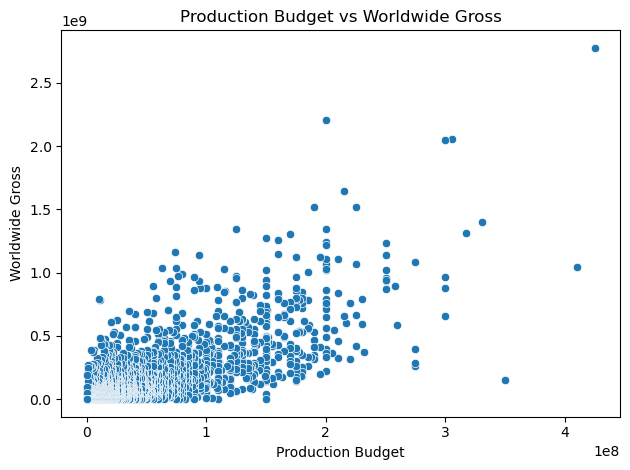

In [51]:
#checking if higher budget leads to higher returns
sns.scatterplot(data=df, x='production_budget', y='worldwide_gross')
plt.title('Production Budget vs Worldwide Gross')
plt.xlabel('Production Budget')
plt.ylabel('Worldwide Gross')
plt.tight_layout()
plt.show()

There is a positive relationship and this suggests that investing more in production can lead to higher global revenue.

### 2. Top 10 Most Profitable Movies

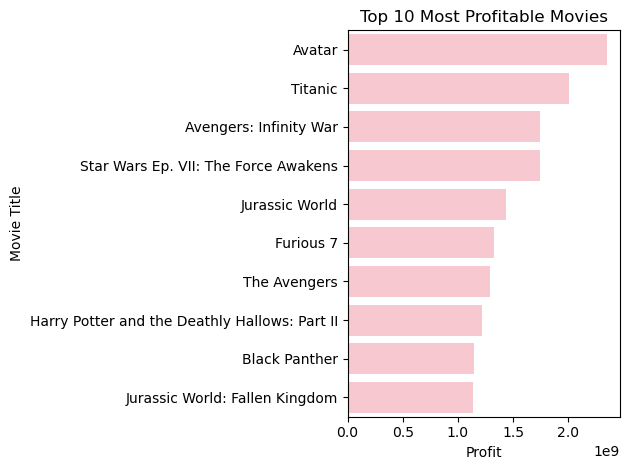

In [52]:
#shows that did well in profits
top_movies = df.sort_values('profit', ascending=False).head(10)

sns.barplot(x='profit', y='title', data=top_movies,color="pink")
plt.title('Top 10 Most Profitable Movies')
plt.xlabel('Profit')
plt.ylabel('Movie Title')
plt.tight_layout()
plt.show()

In [53]:
df.loc[df["title"]=="Avatar"]

,id,title,production_budget,domestic_gross,worldwide_gross,year,studio,foreign_gross,profit
0,1,Avatar,425000000.0,760507625.0,2.776345e+09,2009,NaN,2.015838e+09,2.351345e+09


Avatar is the top most profitable movie(2,776,345,000) which had a high production budget($ 425,000,000), showing that if a film performs well globally, the high investment pays off

### Top 10 best studios

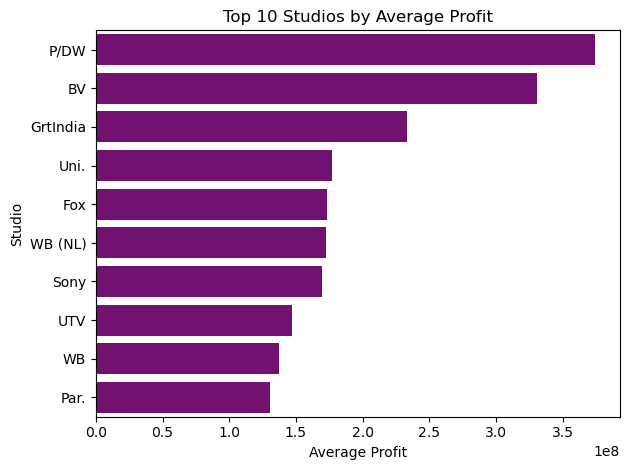

In [54]:
#seeing the most profitable studios
studio_profit = df.groupby('studio')['profit'].mean().sort_values(ascending=False).head(10)

sns.barplot(x=studio_profit.values, y=studio_profit.index,color= "purple")
plt.title('Top 10 Studios by Average Profit')
plt.xlabel('Average Profit')
plt.ylabel('Studio')
plt.tight_layout()
plt.show()

In [55]:
df.loc[df["studio"]=="P/DW"]

,id,title,production_budget,domestic_gross,worldwide_gross,year,studio,foreign_gross,profit
63,64,Transformers: Dark of the Moon,195000000.0,352390543.0,1.123791e+09,2011,P/DW,771400000.0,928790543.0
126,27,Shrek Forever After,165000000.0,238736787.0,7.562447e+08,2010,P/DW,513900000.0,591244673.0
129,30,How to Train Your Dragon,165000000.0,217581232.0,4.948710e+08,2010,P/DW,277300000.0,329870992.0
173,74,Kung Fu Panda 2,150000000.0,165249063.0,6.648375e+08,2011,P/DW,500400000.0,514837547.0
196,97,Madagascar 3: Europe's Most Wanted,145000000.0,216391482.0,7.469213e+08,2012,P/DW,530500000.0,601921271.0
201,2,Rise of the Guardians,145000000.0,103412758.0,3.069009e+08,2012,P/DW,203500000.0,161900902.0
245,46,Puss in Boots,130000000.0,149260504.0,5.549875e+08,2011,P/DW,405700000.0,424987477.0
246,47,Megamind,130000000.0,148415853.0,3.218872e+08,2010,P/DW,173500000.0,191887208.0
750,51,Dinner for Schmucks,69000000.0,73026337.0,8.679650e+07,2010,P/DW,13800000.0,17796502.0
1500,1,A Thousand Words,40000000.0,18450127.0,2.079049e+07,2012,P/DW,3600000.0,-19209514.0


P/DW (Paramount/DreamWorks) has the highest average profit, making it the most profitable studio on average.

### Profit over time

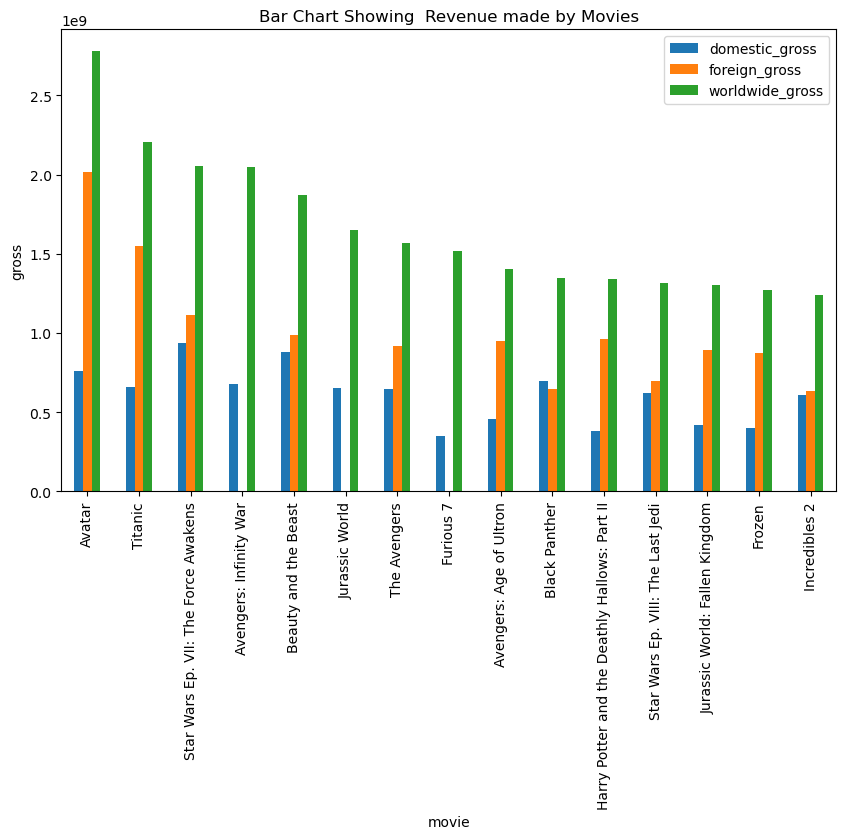

In [56]:
##slicing the title column
df.groupby(['title'])[['domestic_gross','foreign_gross','worldwide_gross']].sum().sort_values(by='worldwide_gross',ascending=False).head(15).plot(kind = 'bar',figsize = (10,6))
plt.title('Bar Chart Showing  Revenue made by Movies')
plt.xlabel('movie')
plt.ylabel('gross')
plt.show();

Avatar is the top most profitable movie(2,776,345,000) which had a high production budget($ 425,000,000), showing that if a film performs well globally, the high investment pays off

### Distribution of production budget

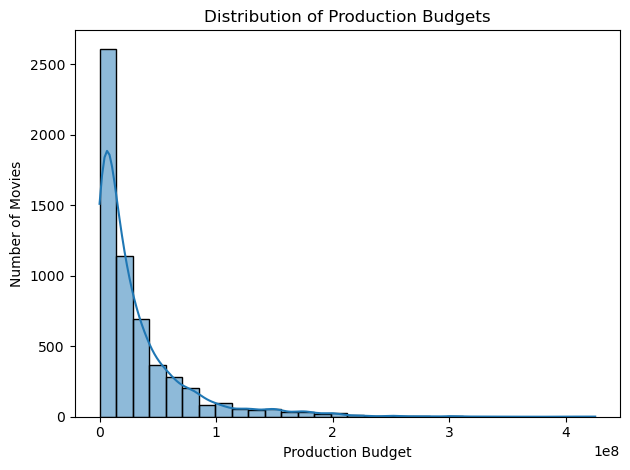

In [57]:
sns.histplot(df['production_budget'], bins=30, kde=True)
plt.title('Distribution of Production Budgets')
plt.xlabel('Production Budget')
plt.ylabel('Number of Movies')
plt.tight_layout()
plt.show()

In [58]:
df["year"]=pd.to_numeric(df["year"])

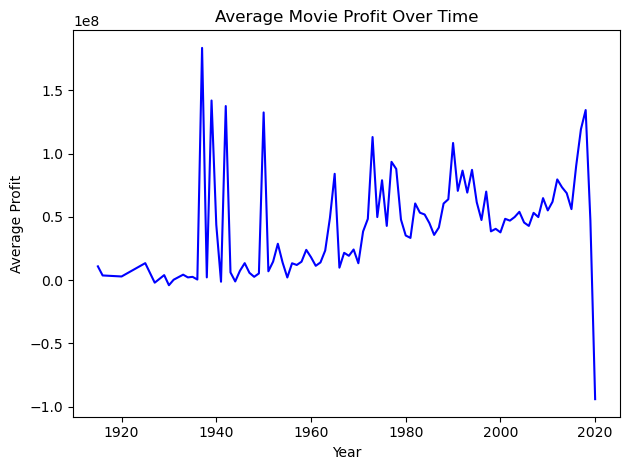

In [59]:
#how profitability has changed over the years
yearly_profit = df.groupby('year')['profit'].mean()

sns.lineplot(x=yearly_profit.index, y=yearly_profit.values,color="blue")
plt.title('Average Movie Profit Over Time')
plt.xlabel('Year')
plt.ylabel('Average Profit')
plt.tight_layout()
plt.show()

### Return On Investment

In [60]:
#creating a new column called roi
df['roi'] = df['profit'] / df['production_budget']
df

,id,title,production_budget,domestic_gross,worldwide_gross,year,studio,foreign_gross,profit,roi
0,1,Avatar,425000000.0,760507625.0,2.776345e+09,2009,NaN,2.015838e+09,2.351345e+09,5.532577
1,2,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,2011,BV,8.046000e+08,6.350639e+08,1.546673
2,3,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,2019,NaN,1.070000e+08,-2.002376e+08,-0.572108
3,4,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,2015,BV,9.464000e+08,1.072414e+09,3.243841
4,5,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,2017,NaN,6.965404e+08,9.997217e+08,3.153696
...,...,...,...,...,...,...,...,...,...,...
5777,78,Red 11,7000.0,0.0,0.000000e+00,2018,NaN,0.000000e+00,-7.000000e+03,-1.000000
5778,79,Following,6000.0,48482.0,2.404950e+05,1999,NaN,1.920130e+05,2.344950e+05,39.082500
5779,80,Return to the Land of Wonders,5000.0,1338.0,1.338000e+03,2005,NaN,0.000000e+00,-3.662000e+03,-0.732400
5780,81,A Plague So Pleasant,1400.0,0.0,0.000000e+00,2015,NaN,0.000000e+00,-1.400000e+03,-1.000000


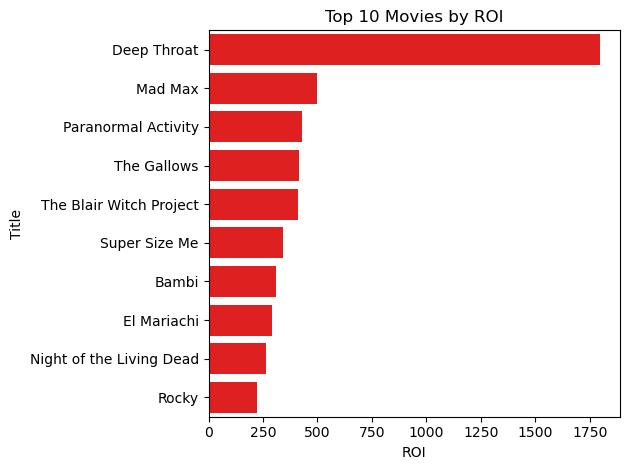

In [61]:
top_roi = df.sort_values('roi', ascending=False).head(10)
sns.barplot(data=top_roi, x='roi', y='title', color = "red")
plt.title('Top 10 Movies by ROI')
plt.xlabel('ROI')
plt.ylabel('Title')
plt.tight_layout()
plt.show()

In [62]:
df.loc[df["title"]=="Deep Throat"]

,id,title,production_budget,domestic_gross,worldwide_gross,year,studio,foreign_gross,profit,roi
5745,46,Deep Throat,25000.0,45000000.0,45000000.0,1972,NaN,0.0,44975000.0,1799.0


**Deep Throat** had the highest ROI in the dataset. With a small production budget of 25,000dollars, it earned a profit of  $44,975,000, showing that low-budget films can yield massive returns when successful.

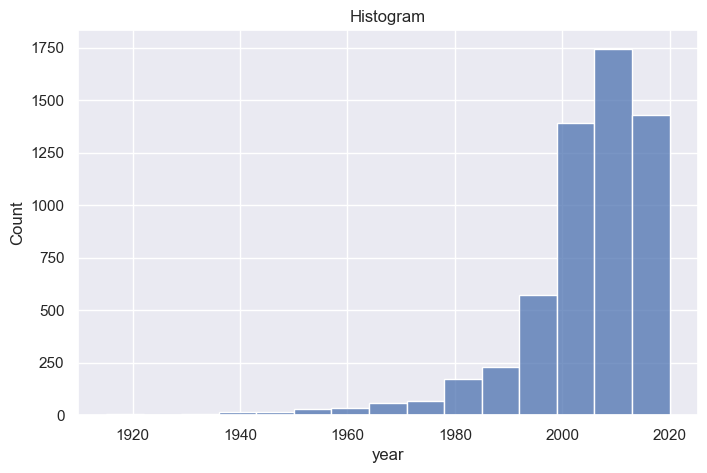

In [63]:
#rate of change in movie production
sns.set(rc={'figure.figsize':(8,5)})
x=df['year']
sns.histplot(x,bins=15,label='Histogram')
plt.title('Histogram')
plt.show();

The data shows a consistent increase in movie production from 1915 to 2020, indicating steady growth in the film industry over the years

# Business recommendations
#### 1.Target High Return on Investment (ROI) Projects
My analysis revealed that:

* Deep Throat had the highest ROI, despite its very low production budget.

* Mad Max: Fury Road followed closely with a high ROI and significant international success.

Don’t just chase big budgets. Instead, fund lower- to mid-budget films with strong storylines or niche audiences that can yield high returns. Look for creative concepts that can go viral or become cult classics.

#### 2. Follow Genre and Studio Trends
While genre wasn’t directly in my merged dataset, profitability patterns suggest studios known for action, animation, and franchise content (like BV, P/DW) tend to succeed.

Invest in studios or creators with a record of high-performing genres, and prioritize franchise-worthy content.

#### 3. Leverage International Box Office
Movies like Transformers and Mad Max made most of their revenue from foreign markets.

Focus on creating globally appealing stories, and ensure strong international distribution and localization (e.g., subtitles, dubbing).

#### 4. Balance Budgets with Expected Returns
Not every high-budget film is profitable. Some mid-budget films outperform blockbusters when it comes to profit ratio.

Joker was made for ~$55 million but grossed over $1 billion globally.

Analyze past ROI trends to determine ideal budget ranges. Avoid over-investing in risky projects unless there's strong evidence of high return potential.

# Final Conclusion
The data shows that success in the movie industry does not depend on high budgets alone. Movies like Deep Throat and Mad Max prove that creative storytelling, strategic budgeting, and international appeal can drive significant ROI.

As the company enters the film business, the focus should be on:

* Smart investments based on ROI

* Building or acquiring franchises

* Tapping into international audiences

* Partnering with proven studios

This approach gives you the best chance of competing with established movie giants while minimizing financial risk.

In [64]:
df.to_csv('movie_data.csv', index=False)